In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
import warnings
warnings.filterwarnings("ignore")

In [2]:
digits = load_digits()

In [3]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [4]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [5]:
len(digits.data[0])  # it's an 8x8 image

64

<Figure size 432x288 with 0 Axes>

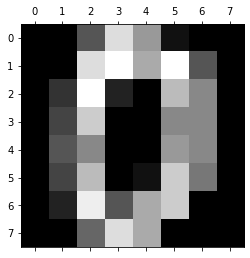

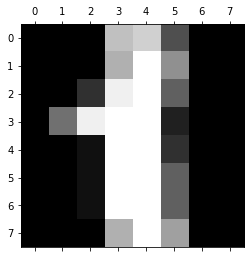

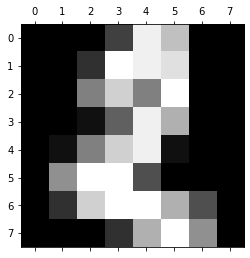

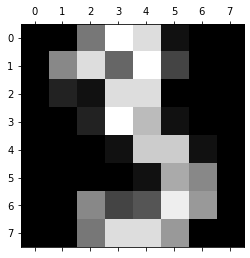

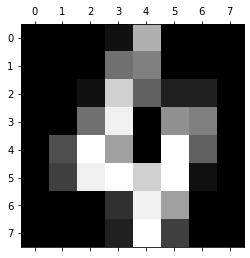

In [6]:
plt.gray()
for i in range(5):
    plt.matshow(digits.images[i])

In [7]:
digits.target[:5]

array([0, 1, 2, 3, 4])

we can use *data* (predictors) and *target* (label) to train our model

## training and testing data

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2)  

In [9]:
len(X_train)

1437

In [10]:
len(X_test)  # 20% of the dataset

360

## applying Model

In [11]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [12]:
model.score(X_test, y_test)  # it calculates the y predicted values and compare them to the actual y values

0.9527777777777777

# making predictions

### on random sample:

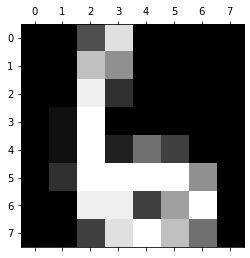

In [13]:
plt.matshow(digits.images[67]);

In [14]:
digits.target[67]

6

In [15]:
model.predict([digits.data[67]])  # supplying multidimensional array

array([6])

In [16]:
model.predict(digits.data[0:5])  # predicting first 5 samples

array([0, 1, 2, 3, 4])

## confusion matrix

In [17]:
from sklearn.metrics import confusion_matrix

y_predicted = model.predict(X_test)
cm = confusion_matrix(y_test, y_predicted) # 2x2 dimensional array
cm

array([[29,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0, 33,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 39,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 30,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 41,  0,  0,  1,  0,  0],
       [ 0,  1,  0,  1,  0, 23,  0,  1,  0,  0],
       [ 0,  2,  0,  0,  1,  1, 32,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 38,  0,  0],
       [ 0,  2,  0,  0,  0,  1,  0,  0, 40,  1],
       [ 0,  0,  0,  0,  0,  2,  0,  0,  0, 38]], dtype=int64)

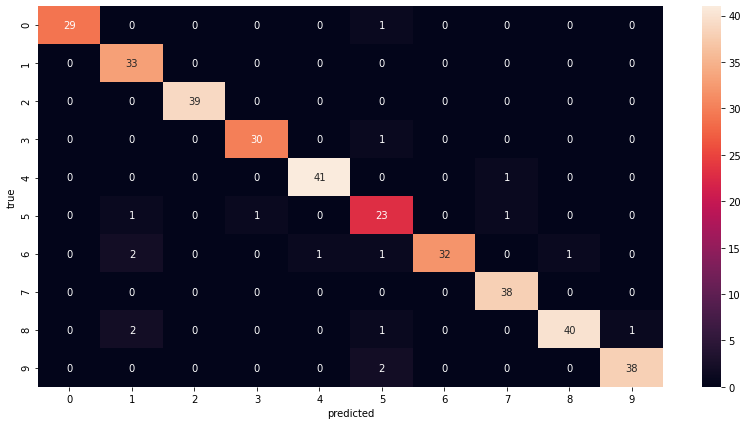

In [18]:
import seaborn as sns
plt.figure(figsize=(14,7))
sns.heatmap(cm, annot=True)
plt.xlabel('predicted')
plt.ylabel('true');

# exercise

In [26]:
from sklearn.datasets import load_iris

iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [32]:
len(iris.data)

150

In [29]:
len(iris.target)

150

In [39]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [40]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

looking at dependent and independent variables of first 5 samples: 

In [52]:
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [53]:
iris.target[:5]

array([0, 0, 0, 0, 0])

In [56]:
iris.target_names[0]  # first 5 samples are all 'setosa'

'setosa'

## train, test split

In [72]:
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [74]:
len(X_train)

105

In [75]:
len(X_test)

45

## applying Model

In [76]:
lr = LogisticRegression(random_state=2)
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.9555555555555556

## making some prediction

In [ ]:
# some random prediction

In [78]:
lr.predict([[5,3,2,0.5]])

array([0])

In [80]:
lr.predict([[7,1,2,0.5]])

array([1])

In [86]:
lr.predict([[7,3,3,7]])

array([2])

In [87]:
# making some prediction from random sample

In [89]:
lr.predict([iris.data[52]])

array([1])

In [90]:
iris.target[52]

1

In [91]:
# predicting last 5 samples
lr.predict(iris.data[-5:])

array([2, 2, 2, 2, 2])

In [92]:
# predicting first 5 samples
lr.predict(iris.data[:5])

array([0, 0, 0, 0, 0])

In [94]:
# predicting some samples in the middle
lr.predict(iris.data[60:65])

array([1, 1, 1, 1, 1])

In [98]:
# predicting random samples
lr.predict([iris.data[3], iris.data[15], iris.data[78], iris.data[123]])

array([0, 0, 1, 2])

# confusion matrix

In [99]:
# storing all predictions
y_pred = lr.predict(X_test)

In [100]:
cm_iris = confusion_matrix(y_test, y_pred)
cm_iris

array([[15,  0,  0],
       [ 0, 13,  2],
       [ 0,  0, 15]], dtype=int64)

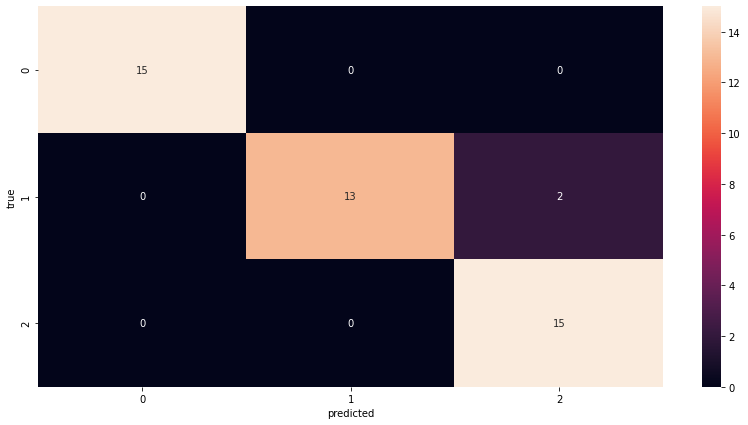

In [101]:
plt.figure(figsize=(14,7))
sns.heatmap(cm_iris, annot=True)
plt.xlabel('predicted')
plt.ylabel('true');

In [103]:
iris.target_names[1], iris.target_names[2]

('versicolor', 'virginica')

the model only made 2 errors, namely misclassifying two versicolor as virginica